<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/Univariate_LR_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
area = df['area'].values
price = df['price'].values

In [ ]:
# initial weight
w = 0

# initial bias
b = 0

In [ ]:
def dj_dw(y_hat, y_i, x_i):
  return (1 / len(area)) * (y_hat - y_i) * x_i

def dj_db(y_hat, y_i):
  return (1 / len(area)) * (y_hat - y_i)

In [ ]:
area_mean = area.mean()
area_std = area.std()
area_scaled = (area - area_mean) / area_std

price_mean = price.mean()
price_std = price.std()
price_scaled = (price - price_mean) / price_std

In [ ]:
# Using vectorized operations

epochs = 2000
losses = []
for epoch in range(epochs):
  y_hat = area_scaled * w + b
  error = y_hat - price_scaled
  dw = (1/len(area) * (np.dot(error, area_scaled)))
  db = (1/len(area) * np.sum(error))

  w = w - 0.001 * dw
  b = b - 0.001 * db

  losses.append(np.mean(error ** 2))

  if epoch % 100 == 0:
    print(f"w: {w}\t b: {b}\t loss: {np.mean(error ** 2)}")

w: 0.00053599734577808	 b: 2.0859970224149732e-19	 loss: 0.9999999999999996
w: 0.051516122633615664	 b: 1.8826123127295127e-17	 loss: 0.9478990501157983
w: 0.09764253965292416	 b: 3.629634819002055e-17	 loss: 0.9052466684783719
w: 0.13937735954648653	 b: 5.334937384826302e-17	 loss: 0.8703293461764169
w: 0.1771386968473868	 b: 7.003735002758246e-17	 loss: 0.8417443211453928
w: 0.2113048583017533	 b: 8.474362903560782e-17	 loss: 0.8183432238631277
w: 0.24221813288268318	 b: 9.783326035126171e-17	 loss: 0.7991859429644856
w: 0.27018822096507855	 b: 1.1087074174135522e-16	 loss: 0.7835028573808187
w: 0.29549533701610853	 b: 1.2323027409916444e-16	 loss: 0.7706639177251365
w: 0.3183930168851759	 b: 1.3496400735024915e-16	 loss: 0.7601533348042656
w: 0.3391106578178314	 b: 1.4466389350447918e-16	 loss: 0.7515488583989565
w: 0.3578558166404197	 b: 1.541551799564677e-16	 loss: 0.7445048138614736
w: 0.374816289139497	 b: 1.630206673017317e-16	 loss: 0.738738215046068
w: 0.3901619914680001	 b: 

In [ ]:
# Using normal multiplications

# epochs = 2000
# losses = []
# for epoch in range(epochs):
#   dw_sum = 0
#   db_sum = 0
#   for i in range(len(area)):
#     x_i = area_scaled[i]
#     y_i = price_scaled[i]

#     y_hat = w * x_i + b

#     dw = dj_dw(y_hat, y_i, x_i)
#     db = dj_db(y_hat, y_i)
#     dw_sum += dw
#     db_sum += db

#   w = w - 0.001 * dw_sum
#   b = b - 0.001 * db_sum
#   epoch_loss = np.mean((w * area_scaled + b - price_scaled) ** 2)
#   losses.append(epoch_loss)

#   if epoch % 100 == 0:
#     print(f"w: {w}\t b: {b}\t loss: {losses[-1]}")

In [ ]:
w, b

(np.float64(0.46353054461562554), np.float64(2.1245879673296863e-16))

In [ ]:
%matplotlib inline

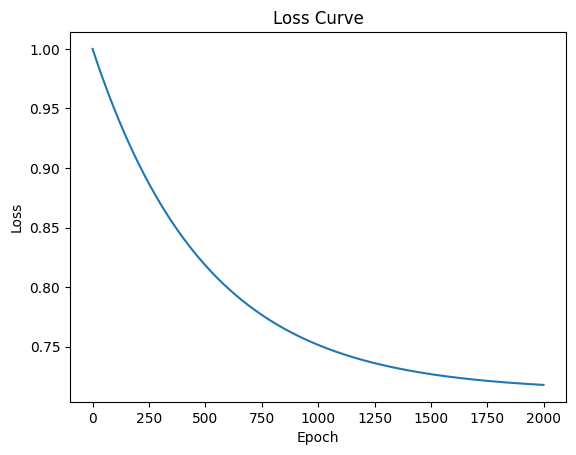

In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()
